In [170]:
import tensorflow as tf
from tensorflow import keras  
print(tf.__version__)

import pickle
import numpy as np
import matplotlib.pyplot as plt


1.14.0


# Load some data...


In [0]:
# (x_train_raw, y_train), (x_test_raw, y_test) = tf.keras.datasets.mnist.load_data()


In [171]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
# dataset_path = "/content/drive/My Drive/machine_learning/shapes/dataset_296.pickle"
dataset_path = "/content/drive/My Drive/machine_learning/shapes/dataset_7992.pickle"
with open(dataset_path, 'rb') as handle:
    data_with_labels = pickle.load(handle)

In [173]:
x_raw = np.stack(data_with_labels['data'])
y_labels = data_with_labels['labels']
print(f'x_raw.shape: {x_raw.shape}')


labels_mapping = {label: i for i, label in enumerate(set(y_labels))}
y = np.asarray([labels_mapping[label] for label in y_labels], dtype=np.int)  

from numpy.random import permutation
perm = permutation(len(x_raw))
x_raw = x_raw[perm]
y = y[perm]

  
test_data_index = round(len(data_with_labels['data']) * 0.8)
print(f'test_data_index: {test_data_index}')

x_train_raw = x_raw[:test_data_index]
y_train = y[:test_data_index]

print(f'## {x_raw[10:].shape}')
x_test_raw = x_raw[test_data_index:]
y_test = y[test_data_index:]

print(x_train_raw[0].shape)
print(f'x_raw.shape: {x_raw.shape}')
print(f'x_test_raw: {x_test_raw.shape}')


x_raw.shape: (7992, 32, 32)
test_data_index: 6394
## (7982, 32, 32)
(32, 32)
x_raw.shape: (7992, 32, 32)
x_test_raw: (1598, 32, 32)


(32, 32)
label = 1


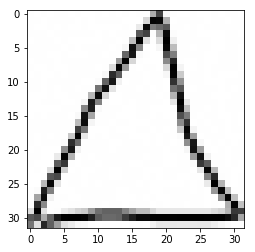

In [174]:
IMG_SIZE = x_train_raw.shape[1]

image_index = 1
label = y_train[image_index]
img = x_train_raw[image_index]
print(img.shape)
print(f'label = {label}')
plt.imshow(img, cmap='Greys')


In [175]:
x_train_raw.shape


(6394, 32, 32)

In [176]:
# Reshaping the array to 4-dims so that it can work with the Keras API
print(f'x_train_raw={x_train_raw.shape}')
print(f'x_test_raw={x_test_raw.shape}')

x_train = x_train_raw.reshape(x_train_raw.shape[0], IMG_SIZE, IMG_SIZE, 1)
x_test = x_test_raw.reshape(x_test_raw.shape[0], IMG_SIZE, IMG_SIZE, 1)

input_shape = (IMG_SIZE, IMG_SIZE, 1)

# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])


x_train_raw=(6394, 32, 32)
x_test_raw=(1598, 32, 32)
x_train shape: (6394, 32, 32, 1)
x_test shape: (1598, 32, 32, 1)
Number of images in x_train 6394
Number of images in x_test 1598


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(IMG_SIZE, kernel_size=(3, 3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(len(labels_mapping), activation=tf.nn.softmax))

In [197]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=4)


Epoch 1/4
6394/6394 [==============================] - 5s 770us/step - loss: 0.0414 - acc: 0.9894
Epoch 2/4
6394/6394 [==============================] - 4s 650us/step - loss: 5.9779e-04 - acc: 1.0000
Epoch 3/4
6394/6394 [==============================] - 4s 638us/step - loss: 0.0014 - acc: 0.9994
Epoch 4/4
6394/6394 [==============================] - 4s 639us/step - loss: 0.0023 - acc: 0.9995


In [195]:
print(x_test.shape)
model.evaluate(x_test, y_test)

(1598, 32, 32, 1)
1598/1598 [==============================] - 0s 311us/step


[0.00011198799099050272, 1.0]

triangle


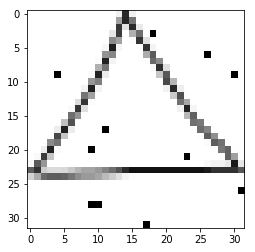

In [206]:
image_index = 403
plt.imshow(x_test[image_index].reshape(IMG_SIZE, IMG_SIZE),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, IMG_SIZE, IMG_SIZE, 1))
inv_labels_mapping = {v: k for k, v in labels_mapping.items()}

print(inv_labels_mapping[pred.argmax()])

In [181]:
# Debug section
type(x_train_raw)
x_train_raw.shape
y_train

array([3, 1, 0, ..., 0, 0, 3])